In [17]:
import matplotlib.pyplot as plt
import numpy as np
import nnfs
from nnfs.datasets import sine_data, spiral_data

from activation_functions import Activation_Linear, Activation_ReLU, Activation_Softmax
from accuracy_measures import Accuracy_Regression, Accuracy_Categorical
from layers import Layer_Dense, Layer_Dropout
from loss_functions import Loss_CategoricalCrossentropy, Loss_MeanSquaredError
from model import Model
from optimizers import Optimizer_Adam

nnfs.init()

# Regression

In [2]:
# Create dataset
X, y = sine_data()
X_test, y_test = sine_data()

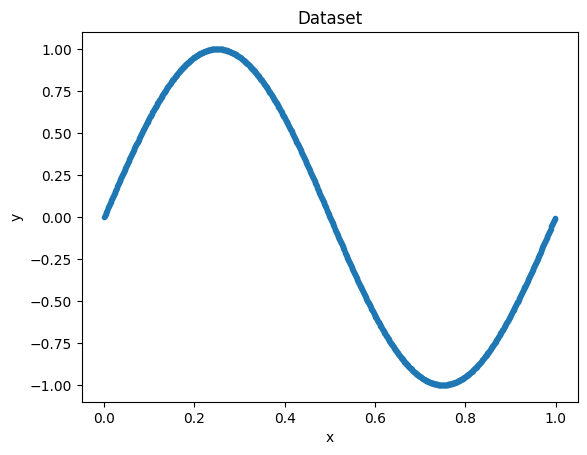

In [3]:
# Plot dataset
plt.plot(X, y, '.')
plt.title('Dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
# Instantiate the model
model = Model()

# Add layers
model.add(Layer_Dense(1, 64))
model.add(Activation_ReLU())
model.add(Layer_Dense(64, 64))
model.add(Activation_ReLU())
model.add(Layer_Dense(64, 1))
model.add(Activation_Linear())

# Set loss, optimizer, accuracy
model.set(loss=Loss_MeanSquaredError(),
          optimizer=Optimizer_Adam(learning_rate=0.0015, decay=1e-3),
          accuracy=Accuracy_Regression())

# Finalize the model
model.finalize()

In [5]:
# Train the model
model.train(X, y, validation_data=(X_test, y_test), epochs=10000, print_every=100)

epoch: (100,)acc: 0.003, loss: 0.499 (data_loss: 0.499, reg_loss: 0.000), lr: 0.001364877161055505
epoch: (200,)acc: 0.003, loss: 0.335 (data_loss: 0.335, reg_loss: 0.000), lr: 0.0012510425354462051
epoch: (300,)acc: 0.003, loss: 0.196 (data_loss: 0.196, reg_loss: 0.000), lr: 0.0011547344110854503
epoch: (400,)acc: 0.004, loss: 0.148 (data_loss: 0.148, reg_loss: 0.000), lr: 0.001072194424588992
epoch: (500,)acc: 0.006, loss: 0.076 (data_loss: 0.076, reg_loss: 0.000), lr: 0.0010006671114076052
epoch: (600,)acc: 0.015, loss: 0.044 (data_loss: 0.044, reg_loss: 0.000), lr: 0.0009380863039399625
epoch: (700,)acc: 0.025, loss: 0.037 (data_loss: 0.037, reg_loss: 0.000), lr: 0.0008828722778104767
epoch: (800,)acc: 0.079, loss: 0.033 (data_loss: 0.033, reg_loss: 0.000), lr: 0.0008337965536409117
epoch: (900,)acc: 0.128, loss: 0.032 (data_loss: 0.032, reg_loss: 0.000), lr: 0.0007898894154818325
epoch: (1000,)acc: 0.231, loss: 0.031 (data_loss: 0.031, reg_loss: 0.000), lr: 0.0007503751875937968
e

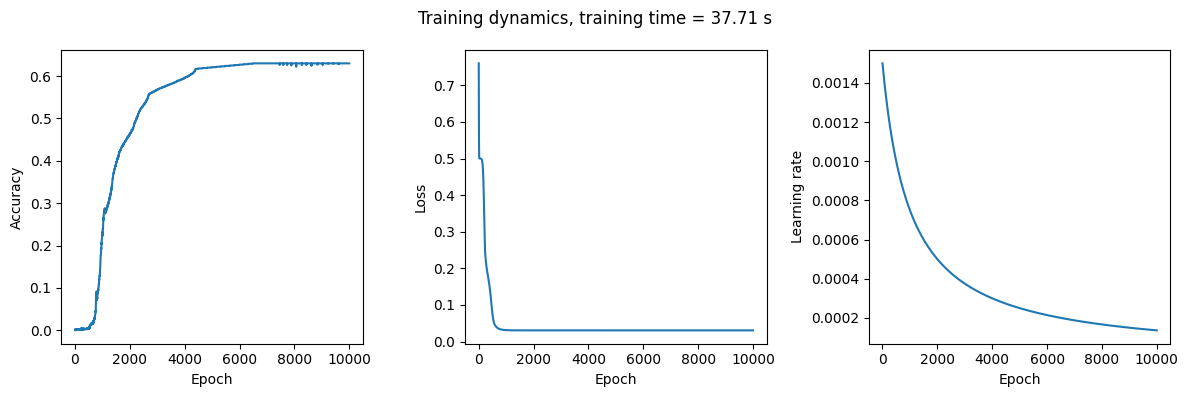

In [6]:
model.plot_training()

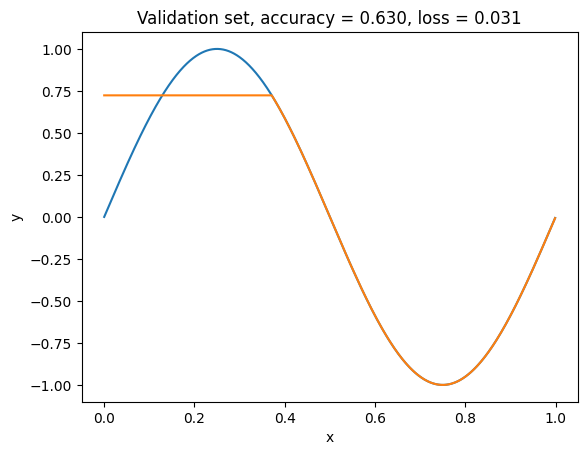

In [12]:
# Plot prediction for validation set
plt.plot(X_test, y_test)
plt.plot(X_test, model.predictions_val)
plt.title(f'Validation set, accuracy = {model.accuracy_val:.3f}, loss = {model.loss_val:.3f}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Categorical regression

In [39]:
# Create dataset
X, y = spiral_data(samples=1000, classes=3)
X_test, y_test = spiral_data(samples=100, classes=3)

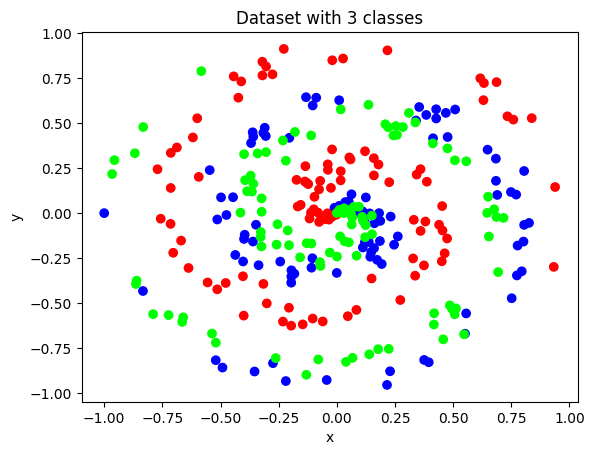

In [40]:
# Plot dataset
plt.scatter(X_test[:, 0 ], X_test[:, 1 ], c = y_test, cmap = 'brg' )
plt.title(f'Dataset with 3 classes')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [19]:
# Instantiate the model
model = Model()

# Add layers
model.add(Layer_Dense(2, 512, weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4))
model.add(Activation_ReLU())
model.add(Layer_Dropout(0.1))
model.add(Layer_Dense(512, 3))
model.add(Activation_Softmax())

# Set loss, optimizer, accuracy
model.set(loss=Loss_CategoricalCrossentropy(),
          optimizer=Optimizer_Adam(learning_rate=0.05, decay=5e-5),
          accuracy=Accuracy_Categorical())

# Finalize the model
model.finalize()

In [20]:
# Train the model
model.train(X, y, validation_data=(X_test, y_test), epochs=1000, print_every=100)

epoch: (100,)acc: 0.738, loss: 0.691 (data_loss: 0.618, reg_loss: 0.073), lr: 0.04975371909050202
epoch: (200,)acc: 0.795, loss: 0.606 (data_loss: 0.522, reg_loss: 0.083), lr: 0.049507401356502806
epoch: (300,)acc: 0.821, loss: 0.557 (data_loss: 0.473, reg_loss: 0.085), lr: 0.0492635105177595
epoch: (400,)acc: 0.818, loss: 0.541 (data_loss: 0.456, reg_loss: 0.084), lr: 0.04902201088288642
epoch: (500,)acc: 0.834, loss: 0.512 (data_loss: 0.429, reg_loss: 0.083), lr: 0.048782867456949125
epoch: (600,)acc: 0.859, loss: 0.499 (data_loss: 0.420, reg_loss: 0.078), lr: 0.04854604592455945
epoch: (700,)acc: 0.829, loss: 0.492 (data_loss: 0.409, reg_loss: 0.083), lr: 0.048311512633460556
epoch: (800,)acc: 0.855, loss: 0.475 (data_loss: 0.399, reg_loss: 0.075), lr: 0.04807923457858551
epoch: (900,)acc: 0.854, loss: 0.472 (data_loss: 0.400, reg_loss: 0.072), lr: 0.04784917938657352
epoch: (1000,)acc: 0.853, loss: 0.465 (data_loss: 0.394, reg_loss: 0.070), lr: 0.04762131530072861
validation, acc: 

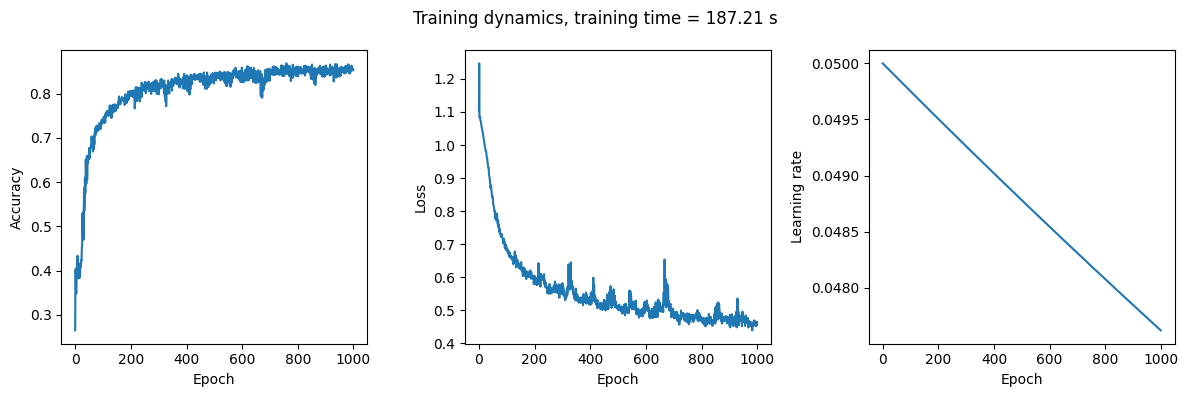

In [22]:
model.plot_training()

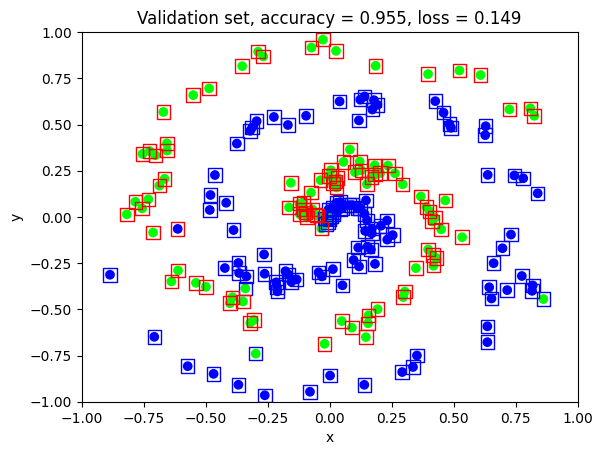

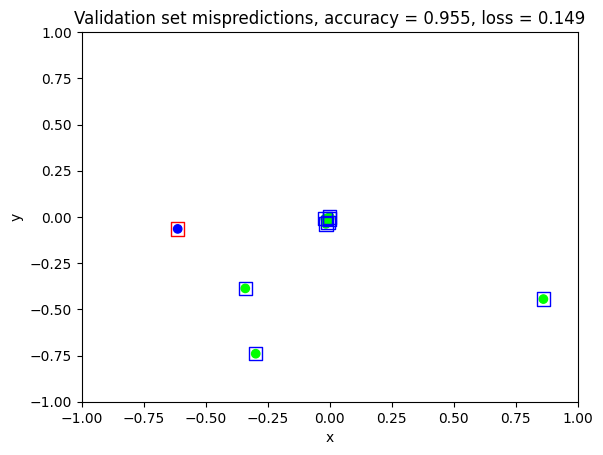

In [104]:
# Plot prediction for validation set
plt.scatter(X_test[:, 0 ], X_test[:, 1 ], c = y_test, cmap='brg')
class1 = model.predictions_val == 0
plt.scatter(X_test[class1, 0 ], X_test[class1, 1 ], edgecolor = 'b', marker='s', facecolors='none', s= 95)
class2 = model.predictions_val == 1
plt.scatter(X_test[class2, 0 ], X_test[class2, 1 ], edgecolor = 'r', marker='s', facecolors='none', s= 95)
class3 = model.predictions_val == 2
plt.scatter(X_test[class3, 0 ], X_test[class3, 1 ], edgecolor = 'g', marker='s', facecolors='none', s= 95)

plt.title(f'Validation set, accuracy = {model.accuracy_val:.3f}, loss = {model.loss_val:.3f}')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.show()

# only where inccorect
incorrect = y_test != model.predictions_val
plt.scatter(X_test[incorrect, 0 ], X_test[incorrect, 1 ], c = y_test[incorrect], cmap='brg')
class1 = model.predictions_val == 0
plt.scatter(X_test[class1 & incorrect, 0 ], X_test[class1 & incorrect, 1 ], edgecolor = 'b', marker='s', facecolors='none', s= 95)
class2 = model.predictions_val == 1
plt.scatter(X_test[class2 & incorrect, 0 ], X_test[class2 & incorrect, 1 ], edgecolor = 'r', marker='s', facecolors='none', s= 95)
class3 = model.predictions_val == 2
plt.scatter(X_test[class3 & incorrect, 0 ], X_test[class3 & incorrect, 1 ], edgecolor = 'g', marker='s', facecolors='none', s= 95)

plt.title(f'Validation set mispredictions, accuracy = {model.accuracy_val:.3f}, loss = {model.loss_val:.3f}')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.show()

# Binary regression

In [98]:
# Create dataset
X, y = spiral_data(samples=1000, classes=2)
X_test, y_test = spiral_data(samples=100, classes=2)

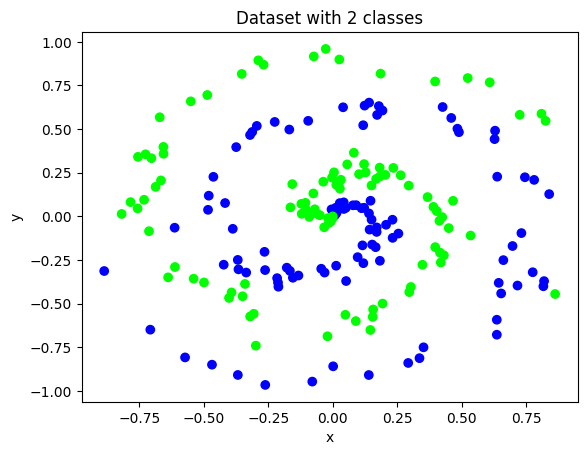

In [99]:
# Plot dataset
plt.scatter(X_test[:, 0 ], X_test[:, 1 ], c = y_test, cmap = 'brg' )
plt.title(f'Dataset with 2 classes')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [100]:
# Instantiate the model
model = Model()

# Add layers
model.add(Layer_Dense(2, 512, weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4))
model.add(Activation_ReLU())
model.add(Layer_Dropout(0.1))
model.add(Layer_Dense(512, 3))
model.add(Activation_Softmax())

# Set loss, optimizer, accuracy
model.set(loss=Loss_CategoricalCrossentropy(),
          optimizer=Optimizer_Adam(learning_rate=0.05, decay=5e-5),
          accuracy=Accuracy_Categorical())

# Finalize the model
model.finalize()

In [101]:
# Train the model
model.train(X, y, validation_data=(X_test, y_test), epochs=1000, print_every=100)

epoch: (100,)acc: 0.880, loss: 0.379 (data_loss: 0.332, reg_loss: 0.046), lr: 0.04975371909050202
epoch: (200,)acc: 0.911, loss: 0.288 (data_loss: 0.229, reg_loss: 0.059), lr: 0.049507401356502806
epoch: (300,)acc: 0.938, loss: 0.270 (data_loss: 0.211, reg_loss: 0.059), lr: 0.0492635105177595
epoch: (400,)acc: 0.943, loss: 0.261 (data_loss: 0.204, reg_loss: 0.057), lr: 0.04902201088288642
epoch: (500,)acc: 0.939, loss: 0.240 (data_loss: 0.184, reg_loss: 0.056), lr: 0.048782867456949125
epoch: (600,)acc: 0.946, loss: 0.228 (data_loss: 0.172, reg_loss: 0.056), lr: 0.04854604592455945
epoch: (700,)acc: 0.965, loss: 0.224 (data_loss: 0.169, reg_loss: 0.055), lr: 0.048311512633460556
epoch: (800,)acc: 0.947, loss: 0.240 (data_loss: 0.186, reg_loss: 0.054), lr: 0.04807923457858551
epoch: (900,)acc: 0.965, loss: 0.201 (data_loss: 0.147, reg_loss: 0.054), lr: 0.04784917938657352
epoch: (1000,)acc: 0.958, loss: 0.200 (data_loss: 0.148, reg_loss: 0.052), lr: 0.04762131530072861
validation, acc: 

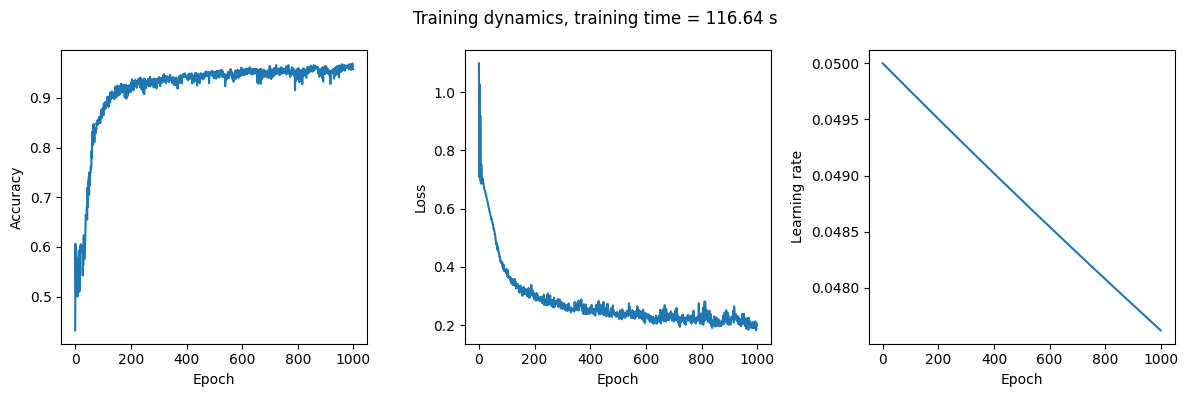

In [102]:
model.plot_training()

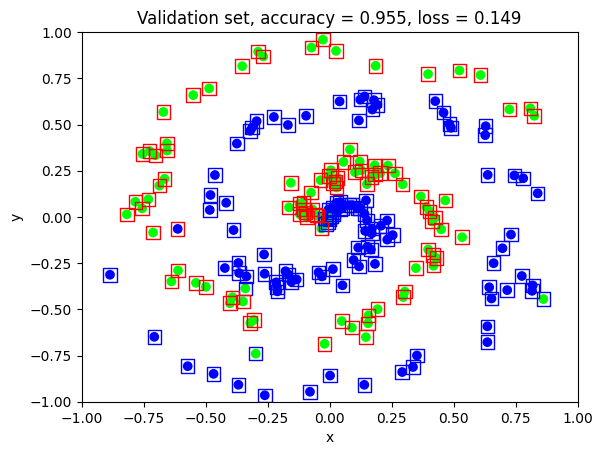

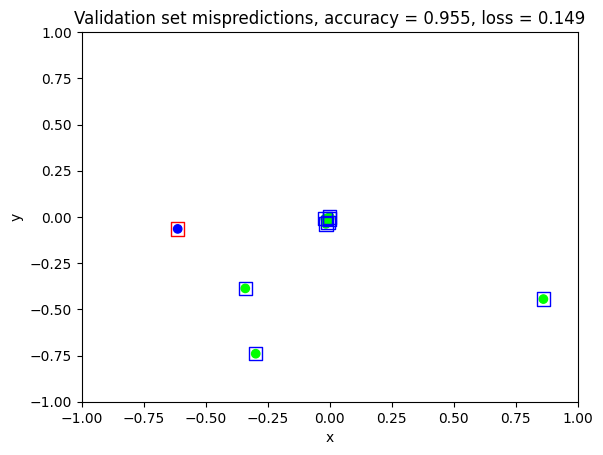

In [105]:
# Plot prediction for validation set
plt.scatter(X_test[:, 0 ], X_test[:, 1 ], c = y_test, cmap='brg')
class1 = model.predictions_val == 0
plt.scatter(X_test[class1, 0 ], X_test[class1, 1 ], edgecolor = 'b', marker='s', facecolors='none', s= 95)
class2 = model.predictions_val == 1
plt.scatter(X_test[class2, 0 ], X_test[class2, 1 ], edgecolor = 'r', marker='s', facecolors='none', s= 95)

plt.title(f'Validation set, accuracy = {model.accuracy_val:.3f}, loss = {model.loss_val:.3f}')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.show()

# only where inccorect
incorrect = y_test != model.predictions_val
plt.scatter(X_test[incorrect, 0 ], X_test[incorrect, 1 ], c = y_test[incorrect], cmap='brg')
class1 = model.predictions_val == 0
plt.scatter(X_test[class1 & incorrect, 0 ], X_test[class1 & incorrect, 1 ], edgecolor = 'b', marker='s', facecolors='none', s= 95)
class2 = model.predictions_val == 1
plt.scatter(X_test[class2 & incorrect, 0 ], X_test[class2 & incorrect, 1 ], edgecolor = 'r', marker='s', facecolors='none', s= 95)

plt.title(f'Validation set mispredictions, accuracy = {model.accuracy_val:.3f}, loss = {model.loss_val:.3f}')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.show()